Pocetna brzina iznosi: 789.66 m/s
Srednja energija demona po ansamblu: 4.12e-21 J
Temperatura demona: 298.58 K


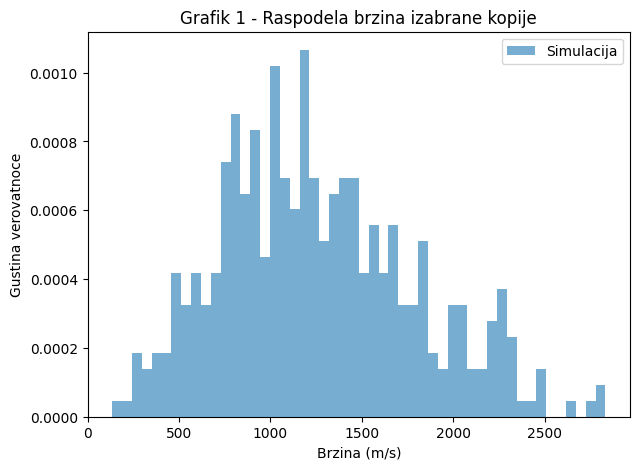

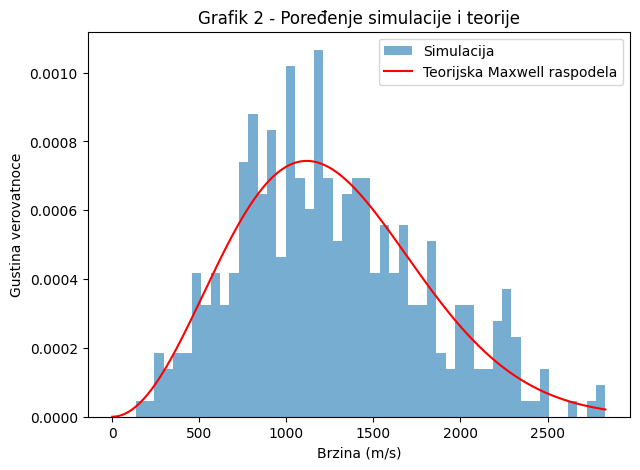

Najverovatnija brzina iz simulacije: 1159.31 m/s
Teorijska najverovatnija brzina: 1116.75 m/s


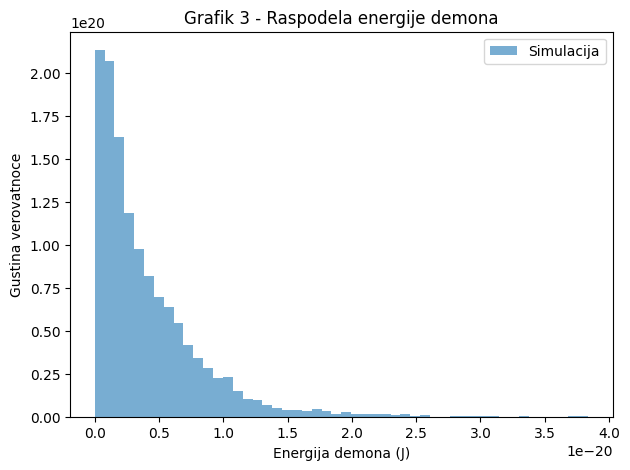

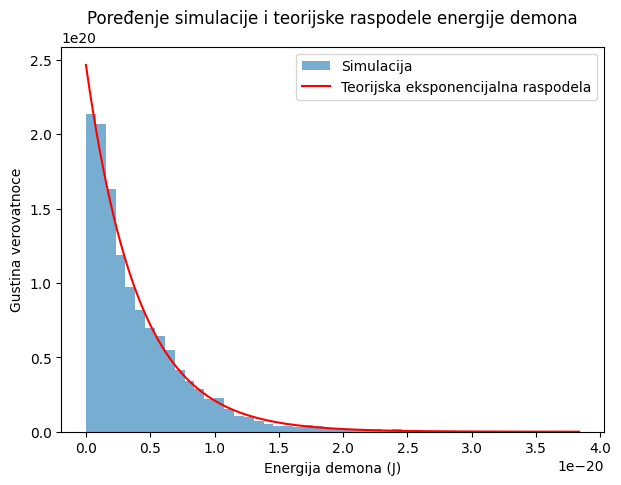

Srednja energija gasa: 6.20e-21 J => T_gasa = 299.47 K
Srednja energija demona: 4.12e-21 J => T_demona = 298.58 K
Srednja unutrasnja energija po ansamblu: 2.48e-18 J
Temperatura gasa iz unutrasnje energije: 299.47 K
Interakcija demona nije značajno promenila temperaturu gasa.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import maxwell

T = 300  
N = 400  
m = 4e-3 / 6.022e23  
k = 1.380649e-23  

v0 = np.sqrt(k * T / m)
print(f"Pocetna brzina iznosi: {v0:.2f} m/s")

def inicijalizacija_sistema(N, v0):
    znaci = np.random.choice([-1, 1], size=(N, 3))
    brzine = znaci * v0
    return brzine

def demon_interakcija(brzine, energijaDemona, delta_max=5 * v0):
    n = np.random.randint(N)
    comp = np.random.randint(3)
    delta = np.random.uniform(-delta_max, delta_max)

    stara = brzine[n, comp]
    nova = stara + delta
    deltaE = 0.5 * m * (nova ** 2 - stara ** 2)

    if deltaE < 0:
        brzine[n, comp] = nova
        energijaDemona += abs(deltaE)
    elif deltaE > 0 and energijaDemona >= deltaE:
        brzine[n, comp] = nova
        energijaDemona -= deltaE

    return brzine, energijaDemona

def simulacija_ansembla(broj_kopija=20, iteracije=500000):
    ansambl = [inicijalizacija_sistema(N, v0) for _ in range(broj_kopija)]
    energijeDemona = [0.0 for _ in range(broj_kopija)]
    istorije_demona = [[] for _ in range(broj_kopija)]

    for _ in range(iteracije):
        for i in range(broj_kopija):
            ansambl[i], energijeDemona[i] = demon_interakcija(ansambl[i], energijeDemona[i])
            istorije_demona[i].append(energijeDemona[i])

    return istorije_demona, ansambl

istorije_demona, ansambl = simulacija_ansembla(broj_kopija=20)

srednje_energije_po_kopiji = [np.mean(istorija[-10000:]) for istorija in istorije_demona]
srednja_energija_ansambla = np.mean(srednje_energije_po_kopiji)

#for energija in srednje_energije_po_kopiji:
#    print(f"{energija:.2e} J")

print(f"Srednja energija demona po ansamblu: {srednja_energija_ansambla:.2e} J")

def energija_u_temp(E, dof=1):
    return 2 * E / (dof * k)

T_demona = energija_u_temp(srednja_energija_ansambla, dof=1)/2
print(f"Temperatura demona: {T_demona:.2f} K")

izabrana_kopija = 19

brzine_izabrane = ansambl[izabrana_kopija]
brzine_magn_izabrane = np.linalg.norm(brzine_izabrane, axis=1)

plt.figure(figsize=(7, 5))
plt.hist(brzine_magn_izabrane, bins=50, density=True, alpha=0.6, label='Simulacija')
plt.xlabel('Brzina (m/s)')
plt.ylabel('Gustina verovatnoce')
plt.title('Grafik 1 - Raspodela brzina izabrane kopije')
plt.legend()
plt.show()

v = np.linspace(0, np.max(brzine_magn_izabrane), 1000)
scale = np.sqrt(k * T / m)
mb = maxwell.pdf(v, scale=scale)

plt.figure(figsize=(7, 5))
plt.hist(brzine_magn_izabrane, bins=50, density=True, alpha=0.6, label='Simulacija')
plt.plot(v, mb, 'r-', label='Teorijska Maxwell raspodela')
plt.xlabel('Brzina (m/s)')
plt.ylabel('Gustina verovatnoce')
plt.title('Grafik 2 - Poređenje simulacije i teorije')
plt.legend()
plt.show()

counts, bins = np.histogram(brzine_magn_izabrane, bins=50)
v_mp_sim = bins[np.argmax(counts)]
v_mp_teorija = np.sqrt(2 * k * T / m)

print(f"Najverovatnija brzina iz simulacije: {v_mp_sim:.2f} m/s")
print(f"Teorijska najverovatnija brzina: {v_mp_teorija:.2f} m/s")

energija_demona_izabrana = istorije_demona[izabrana_kopija]

plt.figure(figsize=(7, 5))
plt.hist(energija_demona_izabrana[-10000:], bins=50, density=True, alpha=0.6, label='Simulacija')
plt.xlabel('Energija demona (J)')
plt.ylabel('Gustina verovatnoce')
plt.title('Grafik 3 - Raspodela energije demona')
plt.legend()
plt.show()

E = np.linspace(0, np.max(energija_demona_izabrana[-10000:]), 1000)
E_d_avg = np.mean(energija_demona_izabrana[-10000:])
f_E = (1 / E_d_avg) * np.exp(-E / E_d_avg)

plt.figure(figsize=(7, 5))
plt.hist(energija_demona_izabrana[-10000:], bins=50, density=True, alpha=0.6, label='Simulacija')
plt.plot(E, f_E, 'r-', label='Teorijska eksponencijalna raspodela')
plt.xlabel('Energija demona (J)')
plt.ylabel('Gustina verovatnoce')
plt.title('Poređenje simulacije i teorijske raspodele energije demona')
plt.legend()
plt.show()

sve_brzine = []
for brzine in ansambl:
    brzine_magn = np.linalg.norm(brzine, axis=1)
    sve_brzine.extend(brzine_magn)

sr_E_gasa = np.mean(0.5 * m * (np.array(sve_brzine) ** 2))
T_gasa = energija_u_temp(sr_E_gasa, dof=3)

print(f"Srednja energija gasa: {sr_E_gasa:.2e} J => T_gasa = {T_gasa:.2f} K")
print(f"Srednja energija demona: {srednja_energija_ansambla:.2e} J => T_demona = {T_demona:.2f} K")

unutrasnje_energije = []

for brzine in ansambl:
    energije = 0.5 * m * np.sum(brzine ** 2)  
    unutrasnje_energije.append(energije)

#for u in unutrasnje_energije:
#    print(f"{u:.2e} J")

U_ans = np.mean(unutrasnje_energije)
print(f"Srednja unutrasnja energija po ansamblu: {U_ans:.2e} J")

T_iz_U = (2 * U_ans) / (3 * N * k)
print(f"Temperatura gasa iz unutrasnje energije: {T_iz_U:.2f} K")

if abs(T_gasa - T) / T < 0.05:
    print("Interakcija demona nije značajno promenila temperaturu gasa.")
else:
    print("Interakcija demona je uticala na temperaturu gasa.")



